## 基于XGBoost原生接口的回归

In [1]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# read in the iris data
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()


dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

Accuracy: 96.67 % 


<Figure size 640x480 with 1 Axes>

## 基于Scikit-learn的分类

Accuracy: 100.00 % 


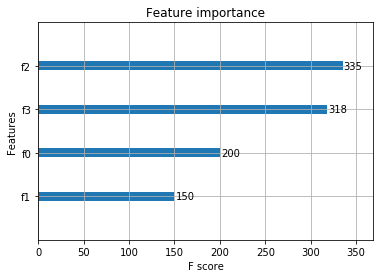

In [2]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# read in the iris data
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练模型
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='multi:softmax')
model.fit(X_train, y_train)

# 对测试集进行预测
ans = model.predict(X_test)

# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

## 基于 Scikit-Learn的回归

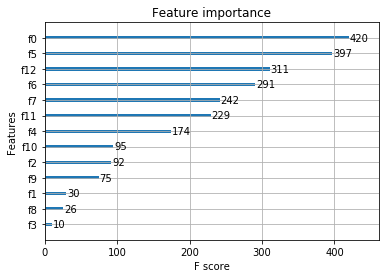

In [6]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target


# # 读取文件原始数据
# data = []
# labels = []
# labels2 = []
# with open("lppz5.csv", encoding='UTF-8') as fileObject:
#     for line in fileObject:
#         line_split = line.split(',')
#         data.append(line_split[10:])
#         labels.append(line_split[8])

# X = []
# for row in data:
#     row = [float(x) for x in row]
#     X.append(row)

# y = [float(x) for x in labels]

# XGBoost训练过程
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='reg:gamma')
model.fit(X_train, y_train)

# 对测试集进行预测
ans = model.predict(X_test)

# 显示重要特征
plot_importance(model)
plt.show() 

## SK 根据文件

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17665 entries, 6827 to 2763
Data columns (total 7 columns):
SB     17665 non-null float64
GJJ    17665 non-null float64
NL     17665 non-null float64
CL     17665 non-null float64
HY     17665 non-null float64
GS     17665 non-null float64
SS     17665 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB
Accuracy: 0.52% 


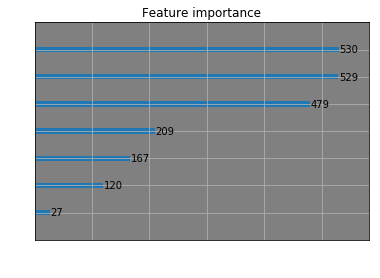

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


roc_auc nan
fpr,tpr [0.00000000e+00 7.14183688e-05 3.57091844e-04 ... 9.99714327e-01
 9.99928582e-01 1.00000000e+00] [nan nan nan ... nan nan nan]
threshold (2893,)


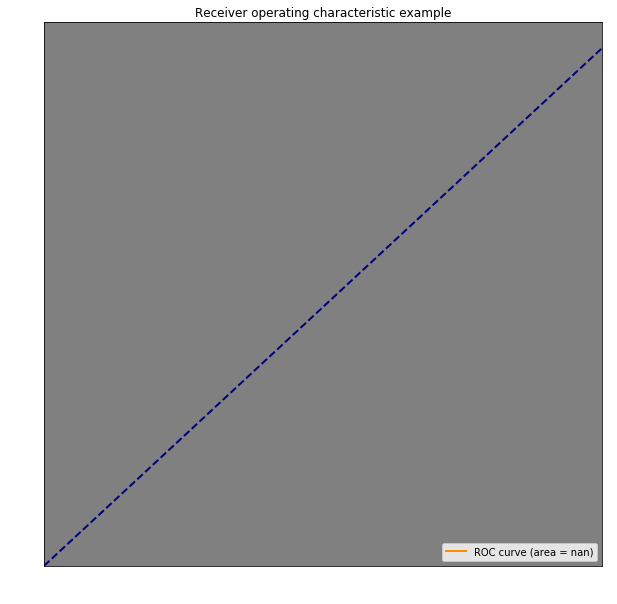

In [24]:
import xgboost as xgb
import pandas as pd
import numpy as np
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# 处理原始数据，然后合并
# 读取
df_wf = pd.read_table('../Data/House_ShangYu/wufang.txt', low_memory=False, dtype=float)
df_yf = pd.read_csv('../Data/House_ShangYu/youfang.csv', low_memory=False, dtype=float)
# 填充原始nan
df_wf = df_wf.fillna(0)
df_yf = df_yf.fillna(0)
# 处理顺序
df_wf = df_wf.reindex(columns=list(["ID","SB","GJJ","NL","CL","HY","GS","SS","Y"]))
df_yf = df_yf.reindex(columns=list(["ID","SB","GJJ","NL","CL","HY","GS","SS","Y"]))
# 填充 Y 列的目标值
df_wf["Y"] = df_wf["Y"].fillna(0)
df_yf["Y"] = df_yf["Y"].fillna(1)



# 合并，有房+0.3无房
df_wf_train, df_wf_test = train_test_split(
    df_wf, test_size=0.7)

df_house = pd.concat([df_wf_train,df_yf])
df_house = df_house.sample(frac=1)

X = df_house.drop(["Y","ID"],axis=1)
y = df_house['Y']
wf_X = df_wf.drop(["Y","ID"],axis=1)
wf_y = df_wf['Y']
X.info()
ss = StandardScaler()
mm = MinMaxScaler()
X = mm.fit_transform(X)
X = pd.DataFrame(X)
wf_X = mm.fit_transform(wf_X)
wf_X = pd.DataFrame(wf_X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 训练模型
# model = xgb.XGBClassifier(num_class=2,max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='multi:softmax')
model = xgb.XGBRegressor(
    booster='gbtree',
#     objective='multi:softmax',
#     num_class= 2,
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.02,
    max_depth=5,
#     n_estimators=500,
    min_child_weight=0.8,
#     reg_alpha=0,
#     reg_lambda=1,
    subsample=0.8,
    silent=1,
#     random_state=42,
    nthread=2)


# model_xgb.fit(df_house_x, df_house_y)
model.fit(X, y)

# 对测试集进行预测
ans = model.predict(wf_X)
# 计算准确率
cnt1 = 0
cnt2 = 0
# for i in range(len(y_test)):
#     if ans[i] == y_test[i]:
#         cnt1 += 1
#     else:
#         cnt2 += 1


# 分类模式计算准确度
# print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))
# 回归模式计算准确度
threshold = 0.5
y_pre = np.array([int(item>threshold) for  item in ans])

print("Accuracy: %.2f%% " % accuracy_score(wf_y,y_pre))
# 显示重要特征

ax=plot_importance(model)
# print("typeppp",type(ppp))
# print("fig",type(fig))
# print("ax",type(ax))
ax.set_facecolor('gray')
# 标签颜色
ax.xaxis.label.set_color('w') 
ax.yaxis.label.set_color('w') 

# 坐标轴颜色
ax.tick_params(axis='x', colors='w') 
ax.tick_params(axis='y', colors='w') 
plt.show()




fpr,tpr,threshold = roc_curve(wf_y, ans)
roc_auc = auc(fpr,tpr)
print('roc_auc',roc_auc)
print('fpr,tpr',fpr,tpr)
print('threshold',threshold.shape)

lw = 2
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.set_facecolor('gray')
# ax.set_xlabel('fpr') 
# ax.set_ylabel('tpr') 

# 边框颜色
# ax.spines['bottom'].set_color('red') 
# ax.spines['top'].set_color('g') 
# 标签颜色
ax.xaxis.label.set_color('w') 
ax.yaxis.label.set_color('w') 

# 坐标轴颜色
ax.tick_params(axis='x', colors='w') 
ax.tick_params(axis='y', colors='w') 
# fig.patch.set_facecolor('black')

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()